## House Prices
<hr>

### Fontes/Conteúdo de apoio: Foi usado o dataset house-prices disponibilizado em aula, 
### https://www.datageeks.com.br/regressao-linear/
### https://christophm.github.io/interpretable-ml-book/logistic.html
### https://minerandodados.com.br/arvores-de-decisao-conceitos-e-aplicacoes/
### https://cursos.alura.com.br/course/data-science-modelo-regressao-linear/


#### Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### Descrição:

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    Com a regressão linear: O Objetivo é fazer a predição do valor de venda de uma casa.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
Com a regressão logística: O Objetivo é fazer a classificação de um valor.</p>


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Com a árvore de decisão: O Objetivo é fazer a classificação da condição geral da casa com base nas colunas de informações sobre ela.</p>


### Vamos usar os modelos:
<ul style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    <li> Regressão linear</li>
    <li> Regressão logística </li>
    <li> Árvore de decisão </li>
</ul>



### Dados:
<p style="font-size: 18px; line-height: 2; text-align: justify">
  <b></b>OverallQual:</b> avalia o material geral e o acabamento da casa: 
  <ul> 
    <li>10 muito excelente</li>
    <li>9 excelente</li> 
    <li>8 muito bom</li> 
    <li>7 bom</li> 
    <li>6 acima da média</li> 
    <li>5 média</li> 
    <li>4 abaixo da média</li> 
    <li>3 justo</li> 
    <li>2 pobres</li> 
    <li>1 muito ruim</li>
  </ul>
</p>
<p style="font-size: 18px; line-height: 2; text-align: justify">
  <b>OverallCond:</b> avalia a condição geral da casa:
  <ul> 
    <li>10 muito excelente</li>
    <li>9 excelente</li> 
    <li>8 muito bom</li> 
    <li>7 bom</li> 
    <li>6 acima da média</li> 
    <li>5 média</li> 
    <li>4 abaixo da média</li> 
    <li>3 justo</li> 
    <li>2 pobres</li> 
    <li>1 muito ruim</li>
  </ul>
</p>

<p style="font-size: 18px; line-height: 2; text-align: justify">
  <b>YearsOld:</b> Quantidade em anos da casa
</p>
<p style="font-size: 18px; line-height: 2; text-align: justify">
  <b>SalePrice:</b> Preço de venda da Casa
</p>



### Importando bibliotecas e os dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


uri = "./house-prices.csv"
df = pd.read_csv(uri)

### Limpando os dados

In [2]:
df = df.select_dtypes(exclude=['object'])
df = df.dropna(axis='columns')

### Inclui coluna de idade da casa

In [3]:
from datetime import datetime

df['YearsOld'] = datetime.today().year - df['YearBuilt']



### Visualização dos dados


In [4]:
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearsOld
0,1,60,8450,7,5,2003,2003,706,0,150,...,61,0,0,0,0,0,2,2008,208500,18
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,0,0,5,2007,181500,45
2,3,60,11250,7,5,2001,2002,486,0,434,...,42,0,0,0,0,0,9,2008,223500,20
3,4,70,9550,7,5,1915,1970,216,0,540,...,35,272,0,0,0,0,2,2006,140000,106
4,5,60,14260,8,5,2000,2000,655,0,490,...,84,0,0,0,0,0,12,2008,250000,21


In [5]:
df.tail()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearsOld
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,40,0,0,0,0,0,8,2007,175000,22
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,0,0,0,2,2010,210000,43
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,60,0,0,0,0,2500,5,2010,266500,80
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,112,0,0,0,0,4,2010,142125,71
1459,1460,20,9937,5,6,1965,1965,830,290,136,...,68,0,0,0,0,0,6,2008,147500,56


In [6]:
df.describe().round(2)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearsOld
count,1460.00,1460.0,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0,1460.00
mean,730.50,56.9,10516.83,6.10,5.58,1971.27,1984.87,443.64,46.55,567.24,...,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2,49.73
std,421.61,42.3,9981.26,1.38,1.11,30.20,20.65,456.10,161.32,441.87,...,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5,30.20
min,1.00,20.0,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0,11.00
25%,365.75,20.0,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,223.00,...,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0,21.00
50%,730.50,50.0,9478.50,6.00,5.00,1973.00,1994.00,383.50,0.00,477.50,...,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0,48.00
75%,1095.25,70.0,11601.50,7.00,6.00,2000.00,2004.00,712.25,0.00,808.00,...,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0,67.00
max,1460.00,190.0,215245.00,10.00,9.00,2010.00,2010.00,5644.00,1474.00,2336.00,...,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0,149.00


### Matriz de correlação


In [7]:
df.corr().round(4)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearsOld
Id,1.0000,0.0112,-0.0332,-0.0284,0.0126,-0.0127,-0.0220,-0.0050,-0.0060,-0.0079,...,-0.0005,0.0029,-0.0466,0.0013,0.0570,-0.0062,0.0212,0.0007,-0.0219,0.0127
MSSubClass,0.0112,1.0000,-0.1398,0.0326,-0.0593,0.0279,0.0406,-0.0698,-0.0656,-0.1408,...,-0.0061,-0.0120,-0.0438,-0.0260,0.0083,-0.0077,-0.0136,-0.0214,-0.0843,-0.0279
LotArea,-0.0332,-0.1398,1.0000,0.1058,-0.0056,0.0142,0.0138,0.2141,0.1112,-0.0026,...,0.0848,-0.0183,0.0204,0.0432,0.0777,0.0381,0.0012,-0.0143,0.2638,-0.0142
OverallQual,-0.0284,0.0326,0.1058,1.0000,-0.0919,0.5723,0.5507,0.2397,-0.0591,0.3082,...,0.3088,-0.1139,0.0304,0.0649,0.0652,-0.0314,0.0708,-0.0273,0.7910,-0.5723
OverallCond,0.0126,-0.0593,-0.0056,-0.0919,1.0000,-0.3760,0.0737,-0.0462,0.0402,-0.1368,...,-0.0326,0.0704,0.0255,0.0548,-0.0020,0.0688,-0.0035,0.0439,-0.0779,0.3760
YearBuilt,-0.0127,0.0279,0.0142,0.5723,-0.3760,1.0000,0.5929,0.2495,-0.0491,0.1490,...,0.1887,-0.3873,0.0314,-0.0504,0.0049,-0.0344,0.0124,-0.0136,0.5229,-1.0000
YearRemodAdd,-0.0220,0.0406,0.0138,0.5507,0.0737,0.5929,1.0000,0.1285,-0.0678,0.1811,...,0.2263,-0.1939,0.0453,-0.0387,0.0058,-0.0103,0.0215,0.0357,0.5071,-0.5929
BsmtFinSF1,-0.0050,-0.0698,0.2141,0.2397,-0.0462,0.2495,0.1285,1.0000,-0.0501,-0.4953,...,0.1118,-0.1023,0.0265,0.0620,0.1405,0.0036,-0.0157,0.0144,0.3864,-0.2495
BsmtFinSF2,-0.0060,-0.0656,0.1112,-0.0591,0.0402,-0.0491,-0.0678,-0.0501,1.0000,-0.2093,...,0.0031,0.0365,-0.0300,0.0889,0.0417,0.0049,-0.0152,0.0317,-0.0114,0.0491
BsmtUnfSF,-0.0079,-0.1408,-0.0026,0.3082,-0.1368,0.1490,0.1811,-0.4953,-0.2093,1.0000,...,0.1290,-0.0025,0.0208,-0.0126,-0.0351,-0.0238,0.0349,-0.0413,0.2145,-0.1490


In [8]:
# Paleta de cores

sns.set_palette("Accent")

sns.set_style("darkgrid")


Text(0.5, 1.0, 'Valor de venda das casas')

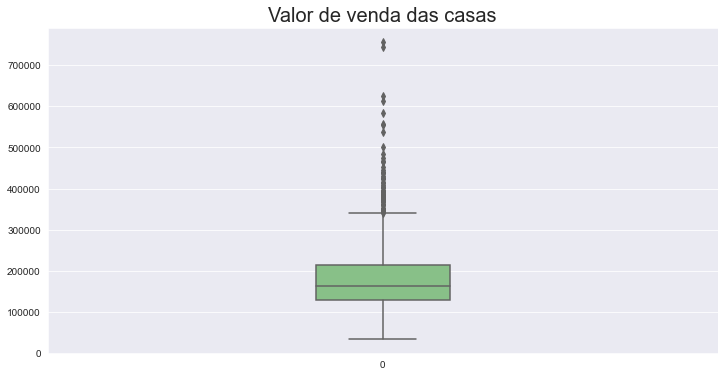

In [9]:
# Box plot da variável depedente Y
# Sales Price = Preço de venda

ax = sns.boxplot(data=df['SalePrice'], orient='v', width=0.2)

ax.figure.set_size_inches(12,6)
ax.set_title('Valor de venda das casas', fontsize=20)




## Investigando a variável dependente y

OverallQual: avalia o material geral e o acabamento da casa

       10 muito excelente
       9 excelente
       8 muito bom
       7 bom
       6 acima da média
       5 média
       4 abaixo da média
       3 justo
       2 pobres
       1 muito ruim

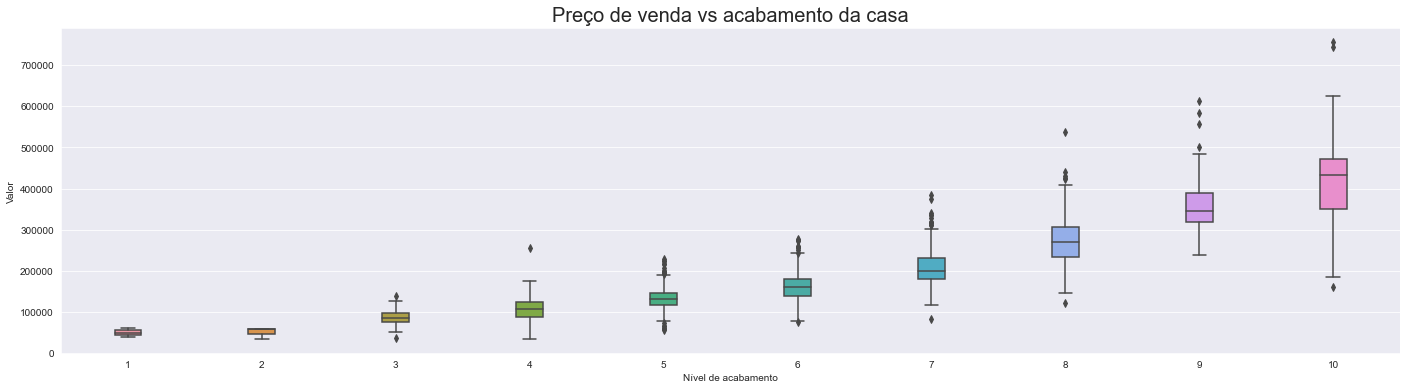

In [10]:
ax = sns.boxplot(y='SalePrice', x ='OverallQual', data=df, orient='v', width=0.2)

ax.figure.set_size_inches(24,6)
ax.set_title('Preço de venda vs acabamento da casa', fontsize=20)

ax.set_ylabel('Valor');
ax.set_xlabel('Nível de acabamento');

# Podemos notar no gráfico abaixo que casas mais bem acabadas são em sua maioria mais caras


<ipython-input-11-0dc8550e6bc1>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title('Distribuição de frequência', fontSize=20)
<ipython-input-11-0dc8550e6bc1>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Preço', fontSize=16)
<ipython-input-11-0dc8550e6bc1>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('Nível de acabamento', fontSize=16)
No handles with labels found to put in legend.


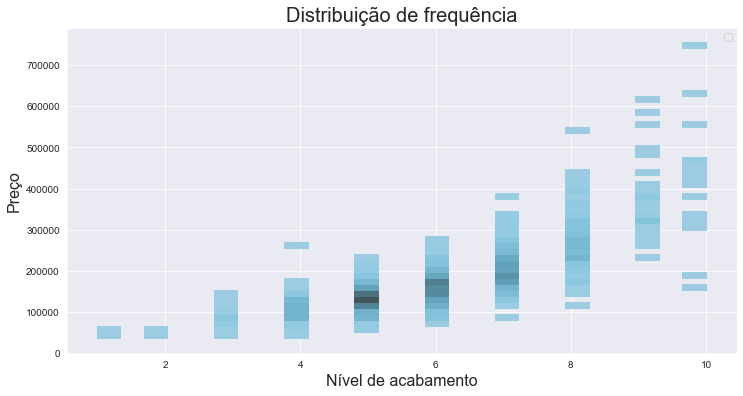

In [11]:
# Distribuição de frequência da variavel dependente y 
ax = sns.histplot(df, y='SalePrice', x ='OverallQual', color="skyblue", kde=True )
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência', fontSize=20)
ax.set_ylabel('Preço', fontSize=16)
ax.set_xlabel('Nível de acabamento', fontSize=16)


plt.legend() 
plt.show()


In [12]:
# Set SEED

SEED = 5
np.random.seed(SEED)


# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
O modelo de regressão linear surgiu do conceito de <b>correlação linear</b>, que calcula o relacionamento entre duas variáveis. Traduzindo, dados A e B, quanto que A explica B.
    Ele é utilizado para realizar previsões, principalmente quando são <b>variáveis numéricas</b> e apresentam algum tipo de tendência de crescimento/decrescimento constante, ou seja, <b>linear</b>.
    
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    Vamos exemplificar com uma relação simples de <b>Lucro x Produção</b>, onde o esperado é quanto maior a produção, maior será o lucro.
Dado o gráfico acima, a linha azul é calculada pela equação , onde y (lucro) é a variável alvo que o modelo tentará prever, x (produção) é a variável explicativa, α é uma constante onde o valor é onde a reta encosta no eixo vertical (no nosso caso, ali bem perto do 2) e ß representa a inclinação da reta. O ε representa o valor de possíveis erros
O modelo tem como objetivo calcular os valores para α e ß, dado um dataset disponível.
Os valores resultantes variam entre -1 a 1, onde -1 indicaria uma correção inversa de 100% e 1 uma correlação de 100%.
</p>
  <p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>  <b>Tá, mas e se o nosso dataset tiver mais de duas variáveis?</b>
A lógica será a mesma, teremos uma variável alvo e as outras serão tratadas como variáveis explicativas e teremos que calcular o valor de ß para cada uma delas.
</p>






## Usaremos Regressão Linear Multipla
<img width='600px' src='./regressao_linear.png'>

### importando o train_test_split

In [13]:

from sklearn.model_selection import train_test_split



### Criando uma Series para armazenar a váriavel y


In [14]:
y = df['SalePrice']

# Criando um dataframe para armazernar a váriavel explicativa x (Variáveis explicativas nesse caso são as condições de 
# acabamento - OverallQual, Condição geral da casa - OverallCond, Idade da Construção - YearsOld )
X = df[['OverallQual', 'OverallCond', 'YearsOld', 'LotArea']] 

### Criando dataset de treino e teste


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2811)

### Verificando o tamanho dos dataframes gerados pelo train_test_split

In [16]:
X_train.shape

(1095, 4)

In [17]:
X_test.shape

(365, 4)

## Importando LinearRegression e metrics da biblioteca scikit-learn

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


### Instanciando LinearRegression()

In [19]:
model = LinearRegression()

## Utilizando o método fit() do "model" para estimar nosso modelo linear utilizando o y_train e X_train

In [20]:
model.fit(X_train, y_train)

LinearRegression()

## Coeficiênte de determinação R² do modelo estimado com os dados do TREINO
### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.
#### Quanto maior o R² melhor o modelo explica o valor
$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [21]:
print('R² = {}'.format(model.score(X_train, y_train).round(2)))

R² = 0.66


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

In [22]:
y_predict = model.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo


In [23]:
print('R² = %s' % metrics.r2_score(y_test, y_predict).round())

# R² igual a 1 significa que o modelo está bem explicado


R² = 1.0


# Previsões com Regressão Linear

### Dados de entrada

In [24]:
entrada = X_test[0:2]
entrada

,OverallQual,OverallCond,YearsOld,LotArea
812,5,5,69,8712
272,8,7,22,11764


### Previsão pontual do modelo

In [25]:
model.predict(entrada)
# Valores previstos pros dados selecionados acima

array([124092.14946035, 273614.33742891])

In [26]:
OverallQual = 10
OverallCond = 10
YearsOld = 50
LotArea = 1000
print('$ {0:.2f} é valor da casa'.format(model.predict([[OverallQual, OverallCond, YearsOld, LotArea]])[0]))

$ 338080.34 é valor da casa


## Interpretando os valores

In [27]:
model.intercept_

-79211.60282394508

In [28]:
type(model.intercept_)

numpy.float64

In [29]:
model.coef_

array([ 4.10001672e+04,  2.45664178e+03, -3.72420794e+02,  1.34489693e+00])

In [30]:
X.columns

Index(['OverallQual', 'OverallCond', 'YearsOld', 'LotArea'], dtype='object')

In [31]:
index=['interceptor', 'OverallQual', 'OverallCond', 'YearsOld', 'LotArea']

### Criar um dataframe pra armazenar os coeficientes do model

In [32]:
pd.DataFrame(data=np.append(model.intercept_, model.coef_), index = index, columns=['Params'])

,Params
interceptor,-79211.602824
OverallQual,41000.167215
OverallCond,2456.641780
YearsOld,-372.420794
LotArea,1.344897


### Interpretação dos coeficientes
<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no preço de uma casa seria de <b>$ - 79211.60</b>. O interceptor representa o efeito da média de Y, tendo as variáveis explicativas excluídas. 
</p>

<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>OverallQual</b> → Mantendo-se os valores constantes, gera uma variação média no preço da casa de <b>$ 41000.16</b>.
</p>

<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>OverallCond</b> → Mantendo-se os valores constantes, geraria uma variação média no preço da casa de <b>$ 2456.64</b>.
</p>

<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>YearsOld</b> → Mantendo-se os valores constantes, geraria uma variação média no preço da casa de <b>$ - 372.42</b>.
</p>

<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>LotArea</b> → Mantendo-se os valores constantes, geraria uma variação média no preço da casa de <b>$ 1.34</b>.
</p>



## Análises gráficas de previsão do modelo

In [33]:
y_previst_train = model.predict(X_train)

### Gráfico de dispersão

#### O resultado ideal no gráfico seria que os valores ficassem o mais próximo possível do eixo, formando ao longo da linha reta, podemos observar que há uma tendencia de dispersão no eixo y conforme os valores vão aumentando ou diminuindo.

<ipython-input-34-92a7d1a047d2>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title('Previsão X Valores reais', fontSize=20)
<ipython-input-34-92a7d1a047d2>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('Preço das casas - Previsto', fontSize=16)
<ipython-input-34-92a7d1a047d2>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Preço das casas - Real', fontSize=16)


<AxesSubplot:title={'center':'Previsão X Valores reais'}, xlabel='Preço das casas - Previsto', ylabel='Preço das casas - Real'>

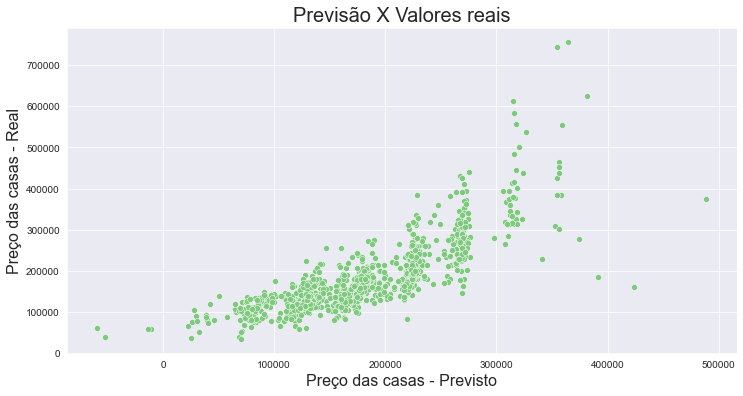

In [34]:
ax = sns.scatterplot(x=y_previst_train, y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Valores reais', fontSize=20)
ax.set_xlabel('Preço das casas - Previsto', fontSize=16)
ax.set_ylabel('Preço das casas - Real', fontSize=16)
ax

### Calculando os resíduos

In [35]:
residuo = y_train - y_previst_train

In [36]:
residuo

1404    76860.761134
442     45412.409669
246    -20398.874350
518     27674.856211
1047     4549.347125
            ...     
727    -30195.461647
341      2529.108967
1108    -1095.676677
1006    -8013.087553
447    -26688.772545
Name: SalePrice, Length: 1095, dtype: float64

### Gráfico de dispersão entre valor estimado e resíduos
#### Verificando a hipótese de variância constante dos resíduos

<ipython-input-37-d114c102f7fa>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title('Resíduos X Previsão', fontSize=20)
<ipython-input-37-d114c102f7fa>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('Preço das casas - Previsto', fontSize=16)
<ipython-input-37-d114c102f7fa>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Resíduos', fontSize=16)


<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='Preço das casas - Previsto', ylabel='Resíduos'>

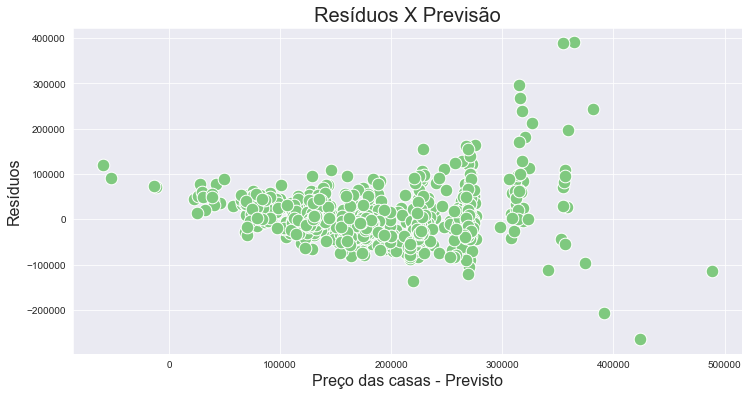

In [37]:
ax = sns.scatterplot(x=y_previst_train, y=residuo, s=160)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos X Previsão', fontSize=20)
ax.set_xlabel('Preço das casas - Previsto', fontSize=16)
ax.set_ylabel('Resíduos', fontSize=16)
ax

### Uma solução é utilizar os resíduos ao quadrado

<img width='800px' src='./var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

O primeiro caso de heterocedasticidade não é um bom resultado.
Resultados tais como os demais indica que exita um problema nos dados.

<ipython-input-38-2c3b0e723104>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title('Resíduos X Previsão', fontSize=20)
<ipython-input-38-2c3b0e723104>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('Preço das casas - Previsto', fontSize=16)
<ipython-input-38-2c3b0e723104>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Resíduos²', fontSize=16)


<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='Preço das casas - Previsto', ylabel='Resíduos²'>

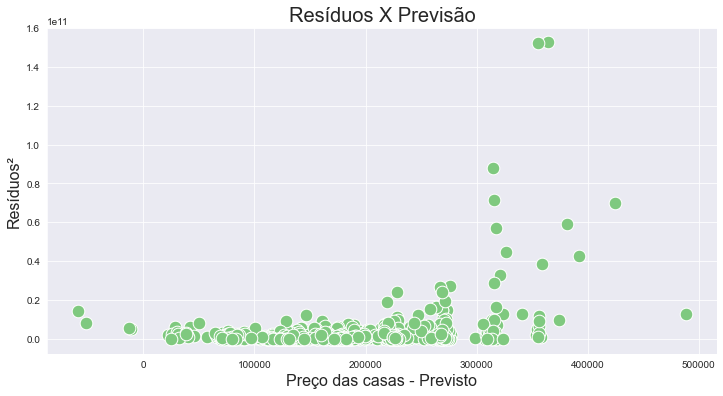

In [38]:
ax = sns.scatterplot(x=y_previst_train, y=residuo**2, s=160)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos X Previsão', fontSize=20)
ax.set_xlabel('Preço das casas - Previsto', fontSize=16)
ax.set_ylabel('Resíduos²', fontSize=16)
ax

C:\Users\Ester\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-39-20511517ed7f>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title('Distribuição de frequência dos resíduos', fontSize=18)


<AxesSubplot:title={'center':'Distribuição de frequência dos resíduos'}, xlabel='Litros', ylabel='Density'>

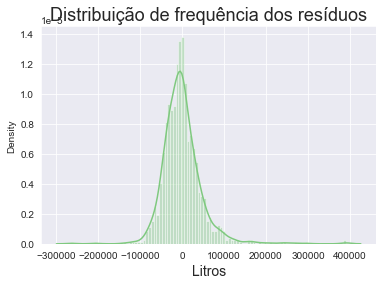

In [39]:
### Gráfico de distribuição de frequências dos resíduos
ax = sns.distplot(residuo, bins=100)
ax.set_title('Distribuição de frequência dos resíduos', fontSize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

# No centro da curva os valores que mais se repetem no modelo

## Comparando os modelos

### Estimando um novo modelo com substituição de variável explicativa por MSSubClass

In [40]:
X2 = df[['OverallQual', 'OverallCond', 'MSSubClass', 'LotArea']] 

### Criando os datasets de treino e teste

In [41]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.25, random_state=2811)

### Instânciando LinearRegression()

In [42]:
model_2 = LinearRegression()

In [43]:
model_2.fit(X2_train, y2_train)

LinearRegression()

### Obter o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [44]:
print('R² = {}'.format(model.score(X_train, y_train).round(2)))

R² = 0.66


In [45]:
print('R² = {}'.format(model_2.score(X2_train, y2_train).round(2)))

R² = 0.66


### Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [46]:
y_previst = model.predict(X_test)
y_previst_2 = model_2.predict(X2_test)

### Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [47]:
print('R² = {}'.format((metrics.r2_score(y2_test, y_previst_2)).round(2)))

R² = 0.7


In [48]:
print('R² = %s' % metrics.r2_score(y_test, y_predict).round())


R² = 1.0


<p style='font-size: 25px; line-height: 2; text-align: justify;'>Podemos concluir que o modelo com o tempo da construção(YearsOld) explica melhor os dados do que o modelo feito acima com 
o tipo de moradia envolvida na venda (MSSubClass).</p>

## Erro quadrático médio e raiz do erro quadrático médio com a variável MSSubClass
Tem como objetivo encontrar a diferença média de um valor e o seu valor inicial. É destinado a compreender um erro de previsão.



In [49]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previst_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previst_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previst_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métrics'])

,Métrics
EQM,1.559225e+09
REQM,3.948703e+04
R²,7.000000e-01


## Erro quadrático médio e raiz do erro quadrático médio com a variável YearsOld
Podemos ver no resultado abaixo que o resultado se comporta melhor para variável YearsOld pois o EQM e o REQM são menores.

In [50]:
EQM = metrics.mean_squared_error(y_test, y_previst).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previst)).round(2)
R2 = metrics.r2_score(y_test, y_previst).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métrics'])

,Métrics
EQM,1.539789e+09
REQM,3.924015e+04
R²,7.000000e-01



# Regresão Logística
<hr>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
Enquanto a regressão linear se encaixa muito bem em prever variáveis numéricas, o modelo de <b>regressão logística</b> se sobressai no contexto de <b>variáveis categóricas</b>.
Regressão logística calcula a probabilidade para problemas de classificação onde existem somente dois valores possíveis (<b>valores binários</b>), exibindo um valor de saída que varia entre 0 e 1. Quanto mais próximo de 1, maior o peso dessa entrada para a variável alvo.
    
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
Enquanto na regressão linear o resultado é uma linha reta, no modelo logístico o resultado é exibido de acordo com uma função, tendo como saída uma linha curva, como exibida abaixo.
</p>
<img width='800px' src='./regressao_logistica.png'>

  <p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> <b>E nos casos onde uma variável categórica possui mais de 2 valores?</b></p>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
Nesses casos, a variável com L possíveis valores é separada em L-1 colunas, sendo um desses valores escolhido como valor de referência. Então é feito uma classificação binária para cada uma delas.</p>





# Árvore de decisão
<hr>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
É utilizado quando a relação entre os dados são não lineares ou quando há
dados interagindo entre sí.
É feita a separação dos valores várias vezes com base em uma variável de
corte que é definida a partir do modelo de dados. Os resultados finais são
chamados de folhas. Árvores são muito utilizadas para regressão e
classificação de dados.
    
</p>
<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Exemplo:</b> </p>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
  Uma empresa de aluguel de carros quer prever a quantidade de veículos
alugados em determinado dia da semana. Podemos utilizar o modelo de árvore para obter esse resultado.
</p>



### Defino meu treino e teste

In [51]:
XA = df[['MSSubClass', 'LotArea', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'YearsOld']]
yA = df["OverallCond"]

X_trainA, X_testA, y_trainA, y_testA = train_test_split(XA, yA, test_size=0.25, random_state=2811)


### Importo lib, instalo graphviz e instancio o objeto classificador

In [52]:
!pip3 install graphviz
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

clf = DecisionTreeClassifier()



### Treino o modelo de árvore de decisão

In [53]:
clf.fit(X_trainA,y_trainA)

DecisionTreeClassifier()

In [54]:
#Importância das variáveis X para prever y
for feature,importance in zip(df.columns, clf.feature_importances_):
    print("{}:{}".format(feature, importance))

Id:0.007687591831512751
MSSubClass:0.0586067483796265
LotArea:0.018590368518222263
OverallQual:0.032509932746384675
OverallCond:0.10460379361009649
YearBuilt:0.029647812566676143
YearRemodAdd:0.011709811957395799
BsmtFinSF1:0.056363242286961004
BsmtFinSF2:0.03480367171865286
BsmtUnfSF:0.043873572687283334
TotalBsmtSF:0.014197418444351356
1stFlrSF:0.002485620380830656
2ndFlrSF:0.03509330167952794
LowQualFinSF:0.0035945634865155503
GrLivArea:0.0019256590106333305
BsmtFullBath:0.004653675942363881
BsmtHalfBath:0.005366358566397297
FullBath:0.012044047842985114
HalfBath:0.0014442442579749978
BedroomAbvGr:0.01775638767426521
KitchenAbvGr:0.0014442442579749978
TotRmsAbvGrd:0.008068593337205427
Fireplaces:0.07547666483018774
GarageCars:0.02808357675004901
GarageArea:0.017099663224324893
WoodDeckSF:0.009982711787937033
OpenPorchSF:0.002707957983703121
EnclosedPorch:0.0109855392163202
3SsnPorch:0.0
ScreenPorch:0.0026258986508636327
PoolArea:0.03167695973223737
MiscVal:0.02136744797676248
MoSold

## Previsão com o modelo de árvore de decisão

In [55]:
previsoes = clf.predict(X_testA)

acuracia = accuracy_score(y_testA, previsoes) * 100
print("A acurácia é de %.2f%%" % acuracia)

A acurácia é de 57.53%


In [56]:
previsoes


array([4, 5, 3, 5, 5, 6, 5, 5, 5, 5, 7, 6, 5, 5, 7, 5, 6, 5, 9, 5, 6, 5,
       5, 5, 6, 5, 8, 5, 6, 5, 7, 7, 5, 8, 5, 5, 6, 5, 6, 5, 7, 5, 5, 5,
       5, 5, 6, 5, 5, 8, 5, 7, 5, 6, 5, 5, 6, 6, 4, 5, 5, 6, 6, 5, 6, 5,
       6, 5, 7, 6, 5, 5, 4, 3, 5, 5, 9, 5, 7, 5, 6, 5, 5, 5, 5, 5, 5, 5,
       7, 5, 8, 7, 7, 5, 7, 6, 7, 6, 5, 6, 8, 7, 6, 9, 5, 5, 7, 5, 7, 4,
       5, 5, 6, 7, 5, 7, 5, 5, 8, 5, 5, 5, 6, 3, 6, 8, 5, 5, 7, 6, 7, 5,
       6, 5, 4, 3, 5, 6, 5, 6, 6, 5, 5, 6, 7, 6, 8, 5, 5, 6, 5, 6, 5, 7,
       5, 5, 1, 5, 5, 5, 8, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 6, 3,
       5, 5, 5, 8, 5, 5, 5, 5, 5, 1, 8, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 4, 7, 5, 5, 5, 5, 5, 7, 5, 5, 8, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 7, 6, 5, 5, 5, 5, 5, 4, 6,
       5, 5, 3, 5, 5, 8, 5, 5, 5, 7, 7, 6, 5, 5, 7, 7, 6, 5, 3, 4, 5, 6,
       8, 6, 6, 5, 5, 7, 5, 8, 5, 7, 5, 6, 5, 6, 7, 5, 6, 7, 5, 4, 6, 6,
       5, 5, 5, 5, 9, 6, 5, 5, 4, 5, 6, 7, 5, 6, 6,

### Desenho da árvore de decisão

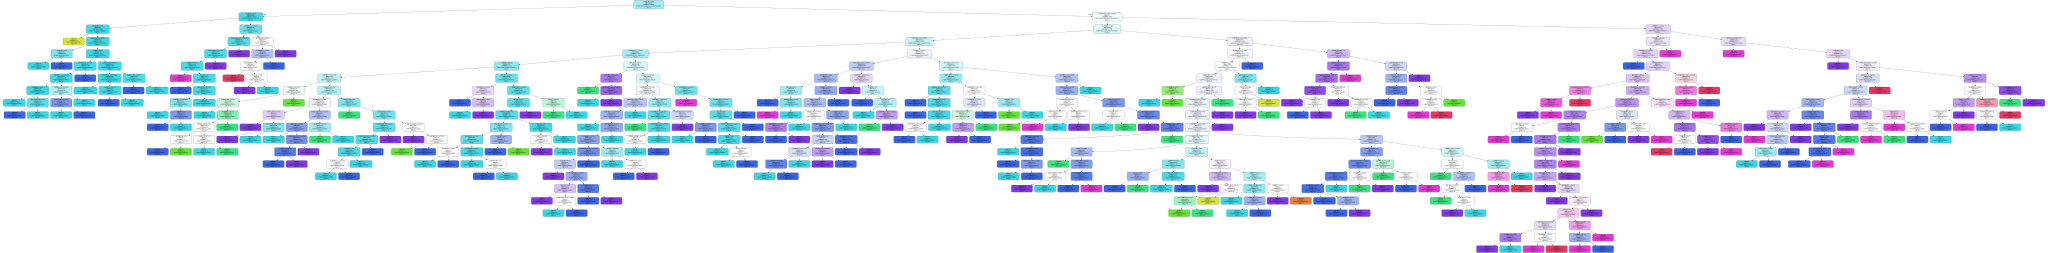

In [57]:

from sklearn.tree import export_graphviz
import graphviz

features = XA.columns

dot_data = export_graphviz(clf, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = str(previsoes))
grafico = graphviz.Source(dot_data)
grafico

In [58]:
# Métricas, resultado dos valoroes por classe
from sklearn import metrics
print(metrics.classification_report(y_testA,previsoes))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.11      0.11      0.11         9
           4       0.08      0.06      0.07        18
           5       0.79      0.81      0.80       209
           6       0.28      0.28      0.28        61
           7       0.41      0.37      0.39        49
           8       0.05      0.07      0.06        14
           9       0.50      0.75      0.60         4

    accuracy                           0.58       365
   macro avg       0.25      0.27      0.26       365
weighted avg       0.57      0.58      0.57       365



C:\Users\Ester\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ester\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Renderizando a árvore de forma interativa:


In [59]:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

# feature matrix
X,y = df.drop('OverallCond',axis=1),df['OverallCond']

# feature labels
features_label = df.drop('OverallCond',axis=1).columns

# class label
class_label = X.columns


def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Conclusões

In [60]:
print("Podemos concluir que o modelo acima acertou %.2f%% das vezes a condição geral das casas de acordo com os valores dispostos nas variáveis X." % acuracia)

Podemos concluir que o modelo acima acertou 57.53% das vezes a condição geral das casas de acordo com os valores dispostos nas variáveis X.
